In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("transfusion.txt", sep="\t")  # use sep="," if comma-separated
print(df.head())

  Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
0                                  2 ,50,12500,98 ,1                                                                 
1                                   0 ,13,3250,28 ,1                                                                 
2                                   1 ,16,4000,35 ,1                                                                 
3                                   2 ,20,5000,45 ,1                                                                 
4                                   1 ,24,6000,77 ,0                                                                 


Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
target_variable          0
dtype: int64


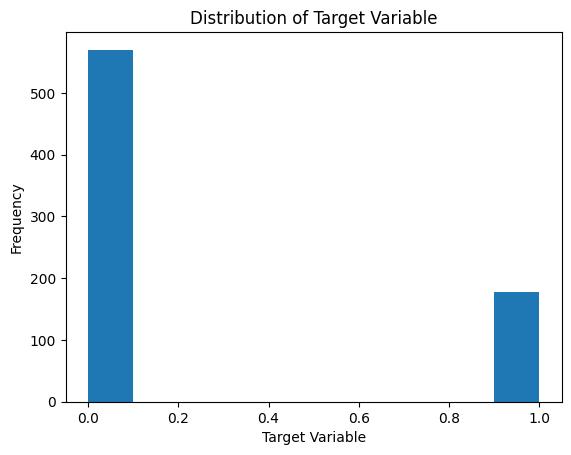

In [3]:
# Checking for missing values
# If the dataframe was read as a single string column, split into proper columns and name the target column
if df.shape[1] == 1:
	tmp = df.iloc[:, 0].astype(str).str.replace('"', '').str.strip().str.split(r'\s*,\s*', expand=True)
	tmp.columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'target_variable']
	for col in tmp.columns:
		tmp[col] = tmp[col].astype(str).str.strip()
	tmp = tmp.apply(pd.to_numeric, errors='coerce')
	df = tmp

print(df.isnull().sum())
# Visualizing the distribution of the target variable
plt.hist(df['target_variable'].dropna().astype(int))
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      -------

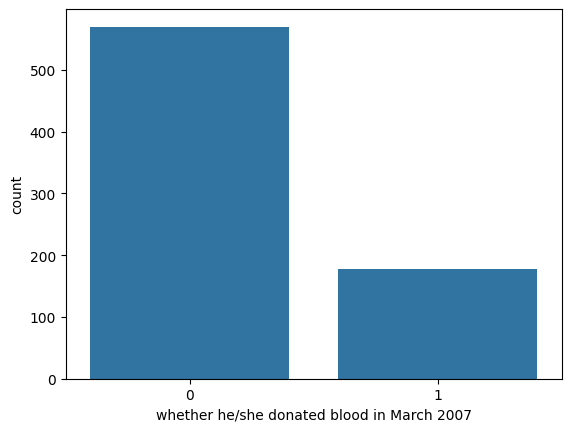

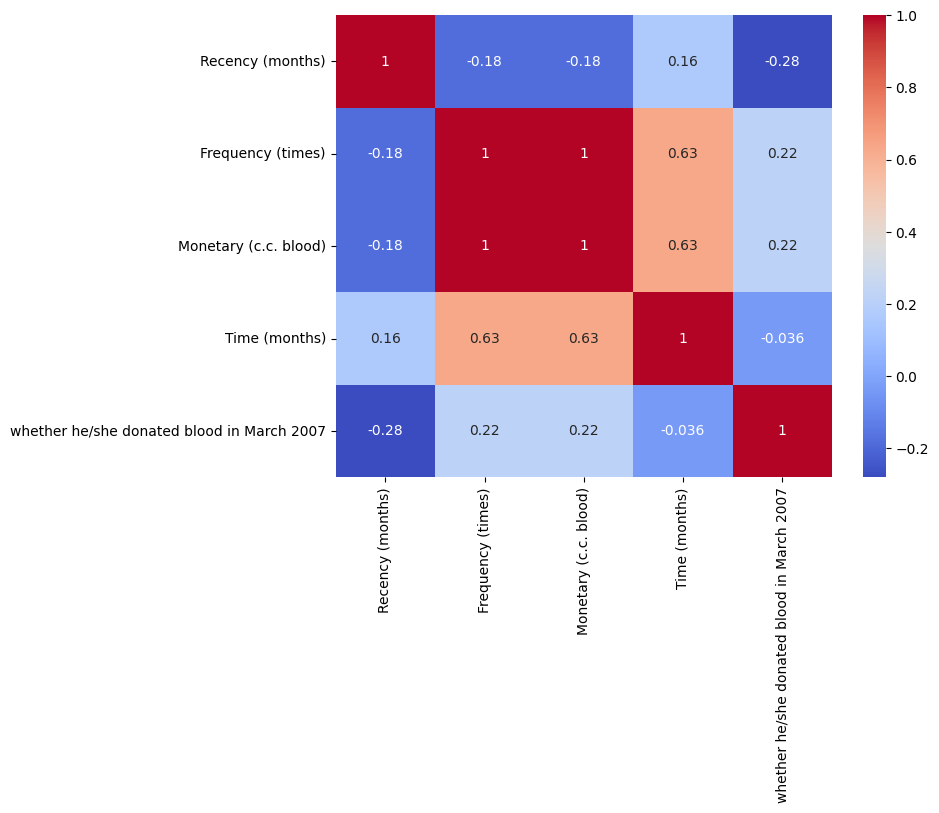

Accuracy: 0.76
[[110   3]
 [ 33   4]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150

                 Feature  Coefficient
0       Recency (months)    -0.098750
1      Frequency (times)     0.000002
2  Monetary (c.c. blood)     0.000536
3          Time (months)    -0.023206


In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns; from sklearn.model_selection import train_test_split; from sklearn.linear_model import LogisticRegression; from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
data = pd.read_csv("transfusion.txt"); print(data.head()); print(data.info()); print(data.describe())

# Visualize target distribution
sns.countplot(x='whether he/she donated blood in March 2007', data=data); plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6)); sns.heatmap(data.corr(), annot=True, cmap='coolwarm'); plt.show()

# Split features and target
X = data[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']]; y = data['whether he/she donated blood in March 2007']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(); model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]}); print(coefficients)
